In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [33]:
df1 = pd.read_csv(r'C:\Users\adity\Documents\Machine Learning\Decision_Tree\Datasets\Crop_recommendation.csv')
df1

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [34]:
df1.shape

(2200, 8)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [36]:
df1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [37]:
df1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [38]:
df1.duplicated().sum()

np.int64(0)

In [39]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [40]:
df = df1

In [41]:
num = df.select_dtypes(include = np.number).columns
num

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

N


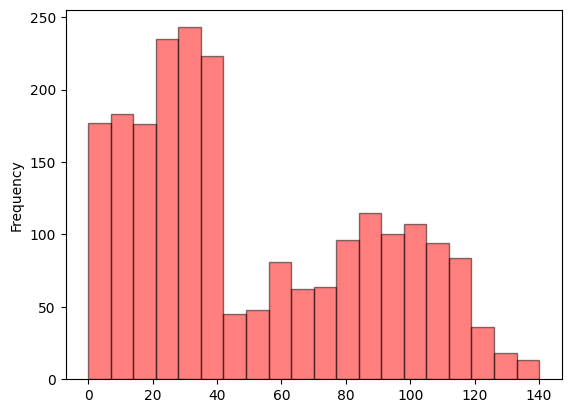

P


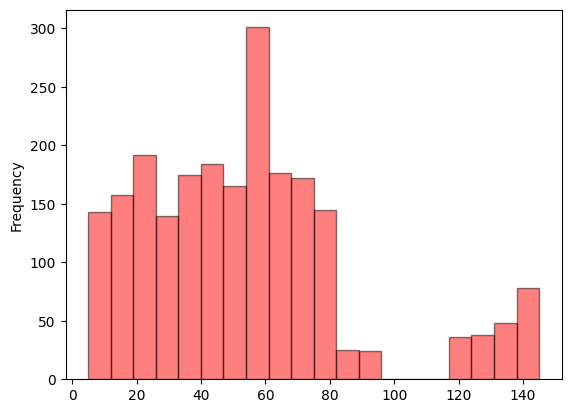

K


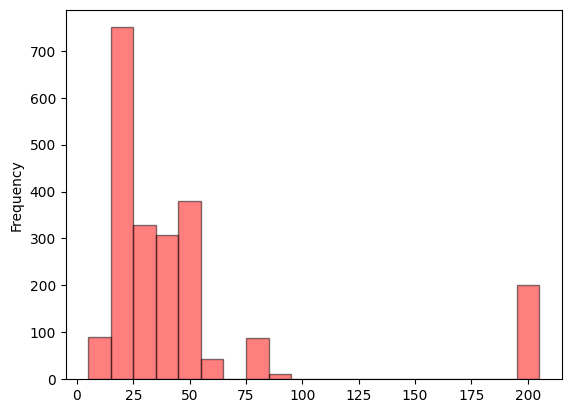

temperature


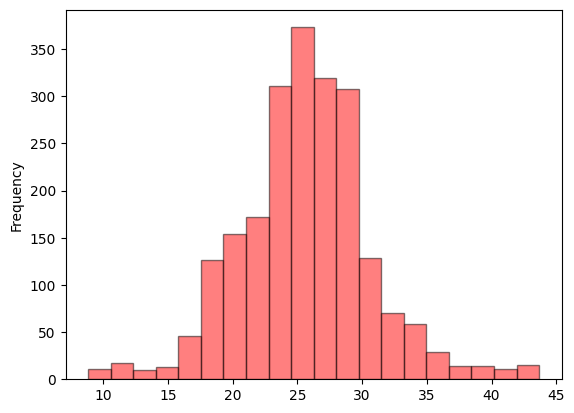

humidity


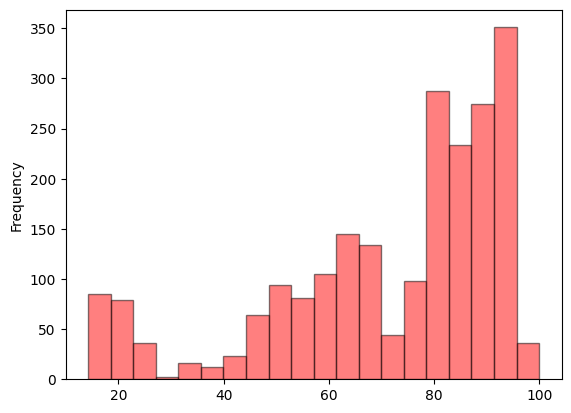

ph


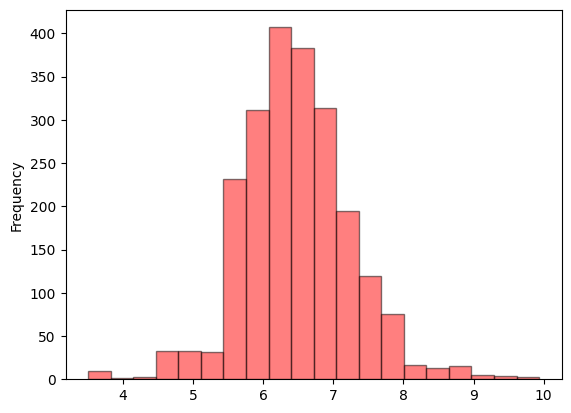

rainfall


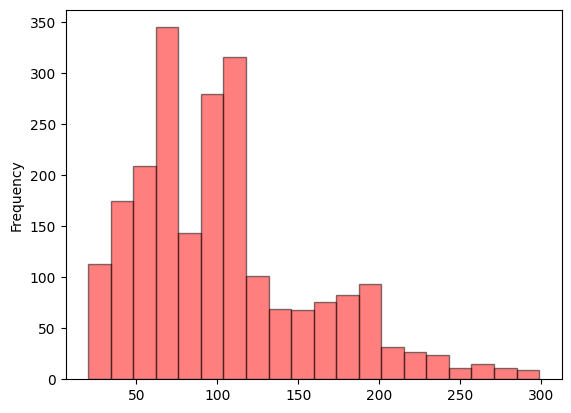

In [42]:
# univeriate analayis
for col in num:
    print(col)
    
    plt.subplot(1, 1, 1)
    df[col].plot(kind = 'hist', alpha = 0.5, bins=20, color = 'r',edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

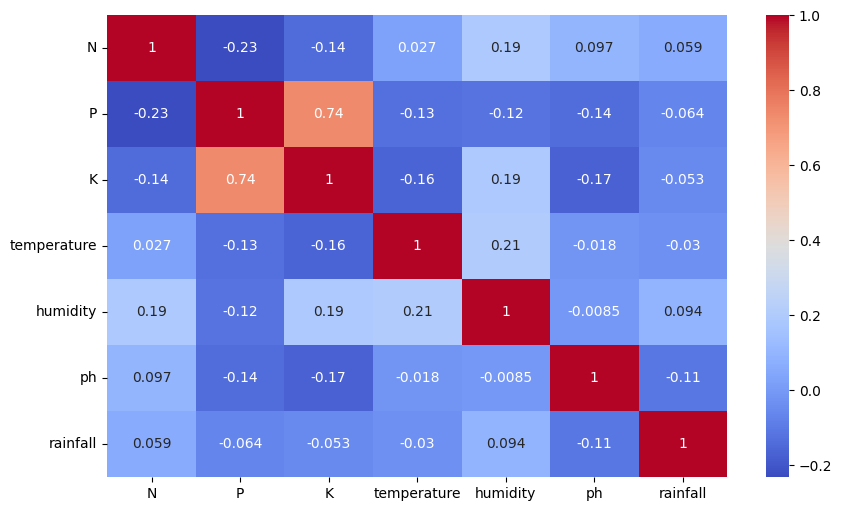

In [43]:
corr = df.drop('label', axis = 1).corr()
plt.figure(figsize = (10, 6))
import seaborn as sns
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [44]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [45]:
features = list(df.columns[:7])
features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [48]:
features = df[['N', 'P' ,'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df["label"]

In [49]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)

In [50]:
# fit the decision tree model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model


DecisionTreeClassifier(criterion='entropy')

In [53]:
features = list(df.columns[:7])

In [54]:
import math

#function to calaculate entropy
def entropy(col):
    counts = col.value_counts()
    probibility = counts/len(col)
    return -sum(probibility * probibility.apply(math.log2))

#function to calculate conditional entropy
def cond_entropy(data, feature, target):
    feature_values = data[features].value_counts()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += len(subset)/len(data) * entropy(subset[target])
    return weighted_entropy

#function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_cond_entropy = cond_entropy(data, feature, target)
    return total_entropy - feature_cond_entropy

#function to information gain of all features
for feature in features:
    ig = information_gain(df, feature, 'label')
    print(f"Information Gain for {feature}:{ig}")

Information Gain for N:-58.95958027045682
Information Gain for P:4.459431618637297
Information Gain for K:4.459431618637297
Information Gain for temperature:4.459431618637297
Information Gain for humidity:4.459431618637297
Information Gain for ph:4.459431618637297
Information Gain for rainfall:4.459431618637297


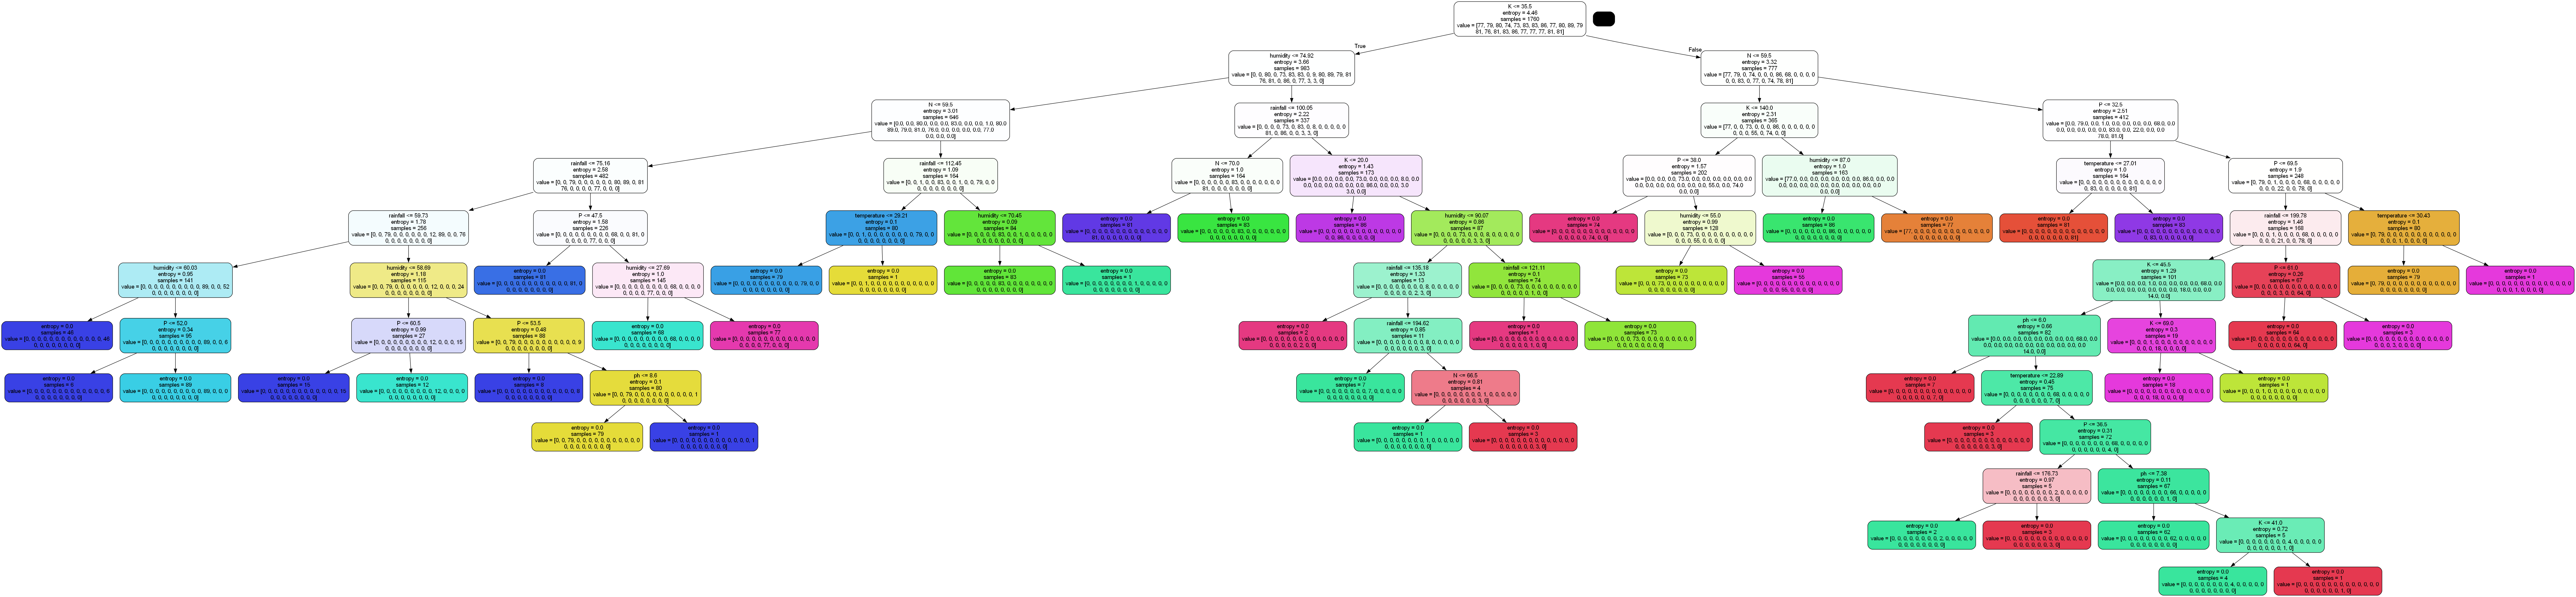

In [56]:
dot_data = export_graphviz(model, out_file= None, feature_names=X_train.columns, precision=2, filled=True, rounded=True)

#convert DOT data to grapth
graph = pydotplus.graph_from_dot_data(dot_data)

#display the graph
Image(graph.create_png())

In [57]:
y_test

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
           ...    
59            rice
71            rice
1908        cotton
1958        cotton
482     pigeonpeas
Name: label, Length: 440, dtype: object

In [58]:
y_pred = model.predict(X_test)
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'mothbeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickpea

In [61]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9840909090909091
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.91      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

In [63]:
new_data = [[90, 42, 43, 20, 82, 6.5, 202]]
y_pred = model.predict(new_data)
print(y_pred[0])


rice
